# –û–ò–ê–î. –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ ‚Ññ2

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [203]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## –í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
–î–∞—Ç–∞—Å–µ—Ç: **datasets/students_simple.csv**
–í—ã–±–∏—Ä–∞—é—Ç—Å—è 2 —Å–ª–æ–±–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ —Ñ–æ—Ä–º—É–ª–∞–º:
1) N % 5
2) $N^2$ % 5 + 5
–≥–¥–µ $N$ - –Ω–æ–º–µ—Ä –≤ —Å–ø–∏—Å–∫–µ

In [172]:
df = pd.read_csv("/Users/user/Desktop/BSU/OAID/oiad-3-2025/datasets/students_simple.csv")
display(df)

height  mass  income   iq  pages  age    bmi  work_exp  friends  test_time
0      159    45     430   95     24   20  3.533        26        5        8.5
1      160    61     640  115     32   25  2.623        63        7        6.2
2      161    56     610  111     24   28  2.875        94       10        6.8
3      162    48     330   97     24   19  3.375        16        4       12.0
4      162    54     420  105     60   23  3.000        49        2        7.5
5      164    58     290   98     16   20  2.828        14        6       10.0
6      166    51     480  109     90   26  3.255        78        9        7.2
7      169    62     610  120     24   19  2.726        10        5        4.2
8      170    70     840  122     48   30  2.429       130       10        3.5
9      170    72     330   92     24   20  2.361        20        3        9.5
10     171    73     560  110     16   28  2.342        86        8        7.8
11     171    64     450  102     48   21  2.672        29        4        8.0
12     172    73     350  108     32   26  2.356        75        7        6.0
13     174    68     310  100     48   21  2.559        22        4        4.8
14     176    81     380  104     64   20  2.173        32        1        8.6
15     176    84     340  104     48   19  2.095        21        5       10.0
16     178    76     660  128     90   27  2.342        96        8        4.5
17     181    90     450  106     48   26  2.011        70        9       12.5
18     183    68     540  105     32   23  2.691        59        6       10.5
19     192    95     750  117     60   27  2.021        98        4        6.5

In [173]:
df.columns[2]

'income'

In [174]:
number: int = 7
num_first_column: int = number % 5
num_second_column: int = number ** 2 % 5 + 5
first_column: str = df.columns[num_first_column]
second_column: str = df.columns[num_second_column]
print(f"–ü–µ—Ä–≤–∞—è –∫–æ–ª–æ–Ω–∫–∞:\n    –ù–æ–º–µ—Ä: {num_first_column}\n    –ù–∞–∑–≤–∞–Ω–∏–µ: {first_column}\n–í—Ç–æ—Ä–∞—è –∫–æ–ª–æ–Ω–∫–∞:\n    –ù–æ–º–µ—Ä: {num_second_column}\n    –ù–∞–∑–≤–∞–Ω–∏–µ: {second_column}")

–ü–µ—Ä–≤–∞—è –∫–æ–ª–æ–Ω–∫–∞:
    –ù–æ–º–µ—Ä: 2
    –ù–∞–∑–≤–∞–Ω–∏–µ: income
–í—Ç–æ—Ä–∞—è –∫–æ–ª–æ–Ω–∫–∞:
    –ù–æ–º–µ—Ä: 9
    –ù–∞–∑–≤–∞–Ω–∏–µ: test_time


In [178]:
my_df = df.iloc[:, [num_first_column, num_second_column]]
display(my_df)

income  test_time
0      430        8.5
1      640        6.2
2      610        6.8
3      330       12.0
4      420        7.5
5      290       10.0
6      480        7.2
7      610        4.2
8      840        3.5
9      330        9.5
10     560        7.8
11     450        8.0
12     350        6.0
13     310        4.8
14     380        8.6
15     340       10.0
16     660        4.5
17     450       12.5
18     540       10.5
19     750        6.5

## 1. –†–∞—Å—á–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
1. –§–µ—Ö–Ω–µ—Ä–∞
2. –ü–∏—Ä—Å–æ–Ω–∞ + –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª
3. –°–ø–∏—Ä–º–µ–Ω–∞
4. –ö–µ–Ω–¥–µ–ª–ª–∞

In [185]:
def corr_fechner(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Compute Fechner correlation
    """
    X: np.array = df[first_column].to_numpy()
    Y: np.array = df[second_column].to_numpy()
    mean_X: float = np.mean(X)
    mean_Y: float = np.mean(Y)
    n_samples: int = X.shape[0] ** 2
    num_pos: int = 0
    num_neg: int = 0
    for x in X:
        for y in Y:
            if (x - mean_X) * (y - mean_Y) > 0:
                num_pos += 1
            elif (x - mean_X) * (y - mean_Y) < 0:
                num_neg += 1
    return (num_pos - num_neg) / n_samples

In [186]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –§–µ—Ö–Ω–µ—Ä–∞ –º–µ–∂–¥—É {first_column} –∏ {second_column}: {corr_fechner(my_df, first_column, second_column)}")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –§–µ—Ö–Ω–µ—Ä–∞ –º–µ–∂–¥—É income –∏ test_time: 0.0


In [187]:
def corr_pearson(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Compute Pearson correlation
    """
    X: np.array = df[first_column].to_numpy()
    Y: np.array = df[second_column].to_numpy()
    mean_X: float = np.mean(X)
    mean_Y: float = np.mean(Y)
    corr: float = np.sum((X - mean_X) * (Y - mean_Y))
    norm_corr: float = np.sqrt(np.sum((X - mean_X) ** 2) * np.sum((Y - mean_Y) ** 2))
    return corr / norm_corr

In [188]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ –º–µ–∂–¥—É {first_column} –∏ {second_column}: {corr_pearson(my_df, first_column, second_column)}")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ –º–µ–∂–¥—É income –∏ test_time: -0.5698939517430254


In [189]:
def confidence_interval(df: pd.DataFrame, first_column: str, second_column: str, confidence_level: float = 0.95) -> tuple[float, float]:
    """
    Computer Pearson confidence interval
    """
    corr: float = corr_pearson(df, first_column, second_column)
    num_samples: int = df[first_column].shape[0]
    z_trans: float = np.log((1 + corr) / (1 - corr)) / 2
    stand_err: float = 1 / np.sqrt(num_samples - 3)
    z_crit: float = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    z_low: float = z_trans - z_crit * stand_err
    z_high: float = z_trans + z_crit * stand_err
    left_bouder: float = (np.exp(2 * z_low) - 1) / (np.exp(2 * z_low) + 1)
    right_bouder: float = (np.exp(2 * z_high) - 1) / (np.exp(2 * z_high) + 1)
    return (left_bouder, right_bouder)

In [190]:
confidence_level: float = 0.95
left_bound, right_bound = confidence_interval(my_df, first_column, second_column, confidence_level)
print(f"{confidence_level}% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: [{left_bound:.3f}, {right_bound:.3f}]")

0.95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: [-0.809, -0.170]


In [191]:
def corr_spearman(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Computer Spearman correlation
    """
    X: np.array = df[first_column].to_numpy()
    n_samples: int = X.shape[0]
    X_position: np.array = np.array([x for x in range(n_samples)])
    X_stack = np.vstack((X, X_position)).T

    Y: np.ndarray = df[second_column].to_numpy()
    Y_position: np.ndarray= np.array([x for x in range(n_samples)])
    Y_stack = np.vstack((Y, Y_position)).T

    X_stack = X_stack[X_stack[:, 0].argsort()]
    Y_stack = Y_stack[Y_stack[:, 0].argsort()]

    rank: np.array = np.array([x + 1 for x in range(n_samples)])
    X_pos_rank: np.ndarray = np.column_stack((X_stack, rank))
    Y_pos_rank: np.ndarray = np.column_stack((Y_stack, rank))

    X_pos_rank = X_pos_rank[X_pos_rank[:, 1].argsort()]
    Y_pos_rank = Y_pos_rank[Y_pos_rank[:, 1].argsort()]

    diff_rank: np.array = X_pos_rank[:, 2] - Y_pos_rank[:, 2]
    norm_coef_spearman: float = n_samples * (n_samples ** 2 - 1)

    return 1 - 6 * np.sum(diff_rank ** 2) / norm_coef_spearman

In [192]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ –º–µ–∂–¥—É {first_column} –∏ {second_column}: {corr_spearman(my_df, first_column, second_column)}")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ –º–µ–∂–¥—É income –∏ test_time: -0.5308270676691729


In [193]:
def corr_kendall(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Computer Kendall correlation
    """
    X: np.array = df[first_column].to_numpy()
    n_samples: int = X.shape[0]
    Y: np.ndarray = np.array(df[second_column])
    n_pos: int = 0
    n_neg: int = 0
    for j in range(n_samples):
        for i in range(j):
            if (X[i] - X[j]) * (Y[i] - Y[j]) > 0:
                n_pos += 1
            elif (X[i] - X[j]) * (Y[i] - Y[j]) < 0:
                n_neg += 1
    norm_coef: float = n_samples * (n_samples - 1) / 2
    return (n_pos - n_neg) / norm_coef

In [194]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö–µ–Ω–¥–µ–ª–ª–∞ –º–µ–∂–¥—É {first_column} –∏ {second_column}: {corr_kendall(my_df, first_column, second_column)}")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö–µ–Ω–¥–µ–ª–ª–∞ –º–µ–∂–¥—É income –∏ test_time: -0.43157894736842106


## –í—ã–≤–æ–¥—ã

1. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –§–µ—Ö–Ω–µ—Ä–∞ = 0.0

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –§–µ—Ö–Ω–µ—Ä–∞ –ø—Ä–æ—Å—Ç–æ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π (+/‚àí) –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

–ó–Ω–∞—á–µ–Ω–∏–µ 0.0 –≥–æ–≤–æ—Ä–∏—Ç –æ –ø–æ–ª–Ω–æ–º –±–∞–ª–∞–Ω—Å–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π –∑–Ω–∞–∫–æ–≤ ‚Äî —Ç–æ –µ—Å—Ç—å, —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –ø–æ –∑–Ω–∞–∫—É –Ω–µ –≤—ã—Ä–∞–∂–µ–Ω–∞.

2. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ = ‚àí0.57 (p ‚âà <0.05)

95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: [‚àí0.81; ‚àí0.17]

–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è.

–ß–µ–º –±–æ–ª—å—à–µ –¥–æ—Ö–æ–¥, —Ç–µ–º –º–µ–Ω—å—à–µ –≤—Ä–µ–º—è —Ç–µ—Å—Ç–∞ (—Ç–æ –µ—Å—Ç—å —Ç–µ—Å—Ç –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –±—ã—Å—Ç—Ä–µ–µ).

–ò–Ω—Ç–µ—Ä–≤–∞–ª –Ω–µ –≤–∫–ª—é—á–∞–µ—Ç 0, –∑–Ω–∞—á–∏—Ç, —Å–≤—è–∑—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞.

–ü–æ—Å–∫–æ–ª—å–∫—É –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–æ–≤–æ–ª—å–Ω–æ —à–∏—Ä–æ–∫–∏–π, –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –Ω–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ—Å—Ç—å –≤ —Ç–æ—á–Ω–æ–π —Å–∏–ª–µ —Å–≤—è–∑–∏, –Ω–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —è–≤–Ω–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–µ.

3. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ = ‚àí0.53

–°–ø–∏—Ä–º–µ–Ω –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –º–æ–Ω–æ—Ç–æ–Ω–Ω—É—é (–Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ª–∏–Ω–µ–π–Ω—É—é) –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.

–ó–Ω–∞—á–µ–Ω–∏–µ –±–ª–∏–∑–∫–æ–µ –∫ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ (‚àí0.57) –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –º–æ–Ω–æ—Ç–æ–Ω–Ω–∞—è.

–¢–æ –µ—Å—Ç—å –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –¥–æ—Ö–æ–¥–∞ –≤—Ä–µ–º—è —Ç–µ—Å—Ç–∞, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è, –Ω–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø–æ –ø—Ä—è–º–æ–π –ª–∏–Ω–∏–∏.

4. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö–µ–Ω–¥–µ–ª–ª–∞ = ‚àí0.43

–≠—Ç–æ –µ—â—ë –æ–¥–∏–Ω —Ä–∞–Ω–≥–æ–≤—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç, –±–æ–ª–µ–µ ¬´—Ä–æ–±–∞—Å—Ç–Ω—ã–π¬ª (—É—Å—Ç–æ–π—á–∏–≤ –∫ –≤—ã–±—Ä–æ—Å–∞–º).

–ó–Ω–∞—á–µ–Ω–∏–µ ‚àí0.43 –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Ç–µ –∂–µ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏, —á—Ç–æ –∏ –°–ø–∏—Ä–º–µ–Ω, —Ç–æ–ª—å–∫–æ –≤ –±–æ–ª–µ–µ —Å–∂–∞—Ç–æ–π —à–∫–∞–ª–µ.

–ü–æ —à–∫–∞–ª–µ –ö–µ–Ω–¥–µ–ª–ª–∞ —ç—Ç–æ —Ç–æ–∂–µ —É–º–µ—Ä–µ–Ω–Ω–æ —Å–∏–ª—å–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å.

## 2. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
1. –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
2. –ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å—Å–µ—è–Ω–∏—è (scatter plot)

In [198]:
def print_hist_column(column: str, df: pd.DataFrame, bins: int = 20, color: str = 'skyblue') -> None:
    if column not in df.columns:
        print(f"Error: Column '{column}' not found in DataFrame.")
        return
    data = df[column]
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, color=color, edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

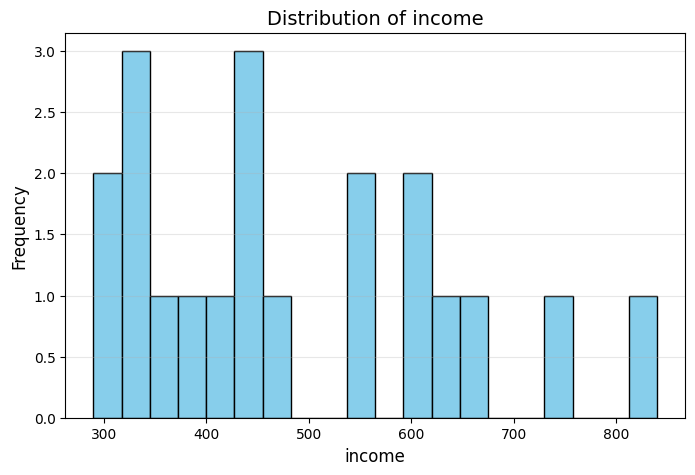

In [199]:
print_hist_column(first_column, my_df)

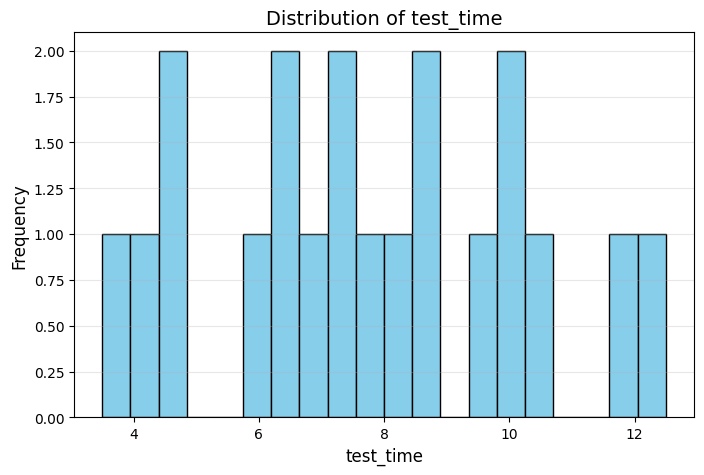

In [200]:
print_hist_column(second_column, my_df)

In [204]:
def print_scatter(df: pd.DataFrame, x_col: str, y_col: str, fig_size: tuple[int, int] = (8, 6)) -> None:
    """
    Plots a scatter plot for two numeric features from the given DataFrame.
    
    The scatter plot visualizes the relationship between two variables,
    helping to identify potential linear or nonlinear correlations and outliers.
    
    :param df: DataFrame containing numeric features
    :param x_col: Name of the column to plot on the X-axis
    :param y_col: Name of the column to plot on the Y-axis
    :param fig_size: Tuple specifying figure size in inches (default = (8, 6))
    :return: None
    """
    plt.figure(figsize=fig_size)
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        color="steelblue",
        edgecolor="white",
        s=70,
        alpha=0.7
    )
    
    plt.title(f"Scatter Plot: {x_col} vs {y_col}", fontsize=14, fontweight="bold", pad=12)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

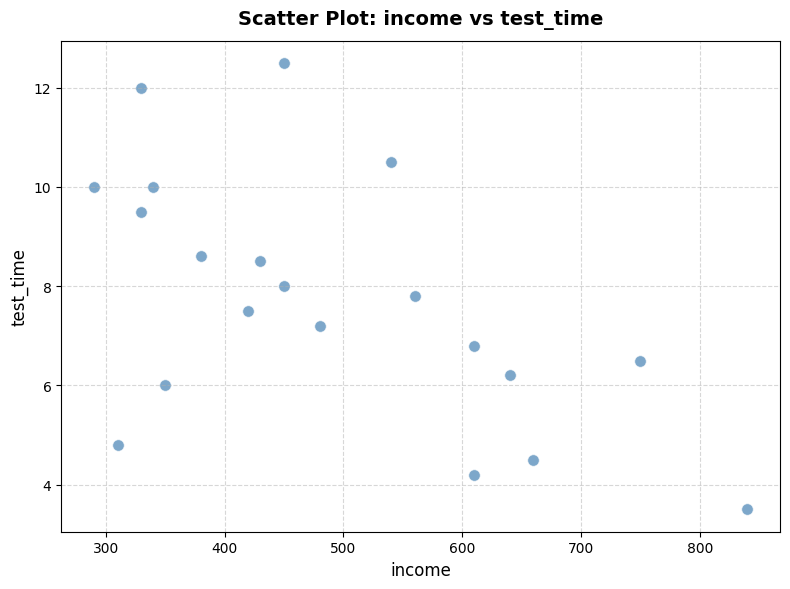

In [207]:
print_scatter(my_df, first_column, second_column)

## 3. –£—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
–ü–æ—Å—Ç—Ä–æ–∏—Ç—å —É—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø–æ –≤–∏–¥–∞–º:
1. –ª–∏–Ω–µ–π–Ω–∞—è, $y=w_1 x + w_0$
2. –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è, $y = w_2 x^2 + w_1 x + w_0$
3. –≥–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è, $y = \frac{w_1}{x} + w_0$ 
4. –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è, $y = w_1^x \cdot w_0$

In [208]:
x: np.array = df[first_column].to_numpy()
y: np.array = df[second_column].to_numpy()

In [211]:
w1, w0 = np.polyfit(x, y, 1)
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"–£—Ä–∞–≤–Ω–µ–Ω–∏–µ: y = {w1:.4f} * x + {w0:.4f}")

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: w1 = -0.0092, w0 = 12.2089
–£—Ä–∞–≤–Ω–µ–Ω–∏–µ: y = -0.0092 * x + 12.2089


In [212]:
w2, w1, w0 = np.polyfit(x, y, 2)
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: w2 = {w2:.4f}, w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"–£—Ä–∞–≤–Ω–µ–Ω–∏–µ: y = {w2:.4f} * x ^ 2 + {w1:.4f} * x + {w0:.4f}")

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: w2 = -0.0000, w1 = 0.0097, w0 = 7.6017
–£—Ä–∞–≤–Ω–µ–Ω–∏–µ: y = -0.0000 * x ^ 2 + 0.0097 * x + 7.6017


In [220]:
w1, w0 = np.polyfit(1 / x, y, 1)
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –≥–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"–£—Ä–∞–≤–Ω–µ–Ω–∏–µ: y = {w1:.4f} / x + {w0:.4f}")

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –≥–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: w1 = 1832.3465, w0 = 3.6149
–£—Ä–∞–≤–Ω–µ–Ω–∏–µ: y = 1832.3465 / x + 3.6149


In [221]:
# ln(y) = ln(w0) + x * ln(w1)
mask = y > 0
x_safe = x[mask]
y_safe = y[mask]

ln_y = np.log(y_safe)

w1_log, w0_log = np.polyfit(x_safe, ln_y, 1)

w0 = np.exp(w0_log)
w1 = np.exp(w1_log)

print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: w0 = {w0:.4f}, w1 = {w1:.4f}")
print(f"–£—Ä–∞–≤–Ω–µ–Ω–∏–µ: y = {w0:.4f} * {w1:.4f}^x")

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: w0 = 14.1216, w1 = 0.9987
–£—Ä–∞–≤–Ω–µ–Ω–∏–µ: y = 14.1216 * 0.9987^x


## –í—ã–≤–æ–¥—ã

### **1. –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è**

$y = -0.0092x + 12.2089$ 

- –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç $w_1 = -0.0092$ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç **—Å–ª–∞–±—É—é –æ–±—Ä–∞—Ç–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å** –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.  
- –ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ $x$, –∑–Ω–∞—á–µ–Ω–∏–µ $y$ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è.

---

### **2. –ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è**

$y = -0.0000x^2 + 0.0097x + 7.6017$

- –ö–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç $w_2 \approx 0$ —É–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ **–Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç—å –Ω–µ—Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–∞**.  
- –ú–æ–¥–µ–ª—å –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω–∞ –ª–∏–Ω–µ–π–Ω–æ–π.

---

### **3. –ì–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è**

$y = \frac{1832.3465}{x} + 3.6149$

- –ë–æ–ª—å—à–æ–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç $w_1 = 1832.35$ –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –ø—Ä–∏ –º–∞–ª—ã—Ö $x$ –∑–Ω–∞—á–µ–Ω–∏–µ $y$ **—Ä–µ–∑–∫–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç**,  
  –Ω–æ –∑–∞—Ç–µ–º **–±—ã—Å—Ç—Ä–æ —Å—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è** –ø—Ä–∏ —Ä–æ—Å—Ç–µ $x$.

---

### **4. –ü–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è**

$y = 14.1216 \cdot 0.9987^x$

- –¢–∞–∫ –∫–∞–∫ $w_1 = 0.9987 < 1$, —Ñ—É–Ω–∫—Ü–∏—è —è–≤–ª—è–µ—Ç—Å—è **–∑–∞—Ç—É—Ö–∞—é—â–µ–π**.  
- $y$ **–º–µ–¥–ª–µ–Ω–Ω–æ —É–±—ã–≤–∞–µ—Ç** —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º $x$.

---

### **üìà –ò—Ç–æ–≥**
- –ù–∞–∏–±–æ–ª–µ–µ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ —è–≤–ª—è—é—Ç—Å—è **–ª–∏–Ω–µ–π–Ω–∞—è** –∏ **–ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è**.  
- –û–±–µ –æ—Ç—Ä–∞–∂–∞—é—Ç **—Å–ª–∞–±—É—é –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å** –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.


## 4. –ü—Ä–æ–≤–µ—Ä–∫–∞ —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
–î–ª—è –Ω–∞–∏–ª—É—á—à–µ–≥–æ –∏ –Ω–∞–∏—Ö—É–¥—à–µ–≥–æ —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–µ –º–æ–¥–µ–ª–∏ –¥–∞–Ω–Ω—ã–º —Å –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è –§–∏—à–µ—Ä–∞

## üîπ –ê–ª–≥–æ—Ä–∏—Ç–º –ø—Ä–æ–≤–µ—Ä–∫–∏ —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–∫—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞)

1. **–í—ã—á–∏—Å–ª–∏—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ:**
   $ \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i $

2. **–í—ã—á–∏—Å–ª–∏—Ç—å —Å—É–º–º—ã –∫–≤–∞–¥—Ä–∞—Ç–æ–≤:**
   - **–û–±—â–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è:**
     $ S_t = \sum (y_i - \bar{y})^2 $
   - **–û–±—ä—è—Å–Ω—ë–Ω–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π:**
     $ S_r = \sum (\hat{y}_i - \bar{y})^2 $
   - **–û—Å—Ç–∞—Ç–æ—á–Ω–∞—è (–æ—à–∏–±–∫–∏):**
     $ S_e = \sum (y_i - \hat{y}_i)^2 $

3. **–í—ã—á–∏—Å–ª–∏—Ç—å –Ω–∞–±–ª—é–¥–∞–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏—è –§–∏—à–µ—Ä–∞:**
   $ F = \frac{S_r / k}{S_e / (n - k - 1)} $

   –≥–¥–µ  
   $ n $ ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π,  
   $ k $ ‚Äî —á–∏—Å–ª–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏ (–±–µ–∑ —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞).

4. **–ù–∞–π—Ç–∏ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ:**
   $ F_{\text{–∫—Ä}} = F_{1 - \alpha}(k, n - k - 1) $

   (–ø–æ —Ç–∞–±–ª–∏—Ü–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –§–∏—à–µ—Ä–∞ –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $ \alpha = 0.05 $)

5. **–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥:**
   - –ï—Å–ª–∏ $ F > F_{\text{–∫—Ä}} $ ‚Üí **–º–æ–¥–µ–ª—å –∑–Ω–∞—á–∏–º–∞**  
   - –ï—Å–ª–∏ $ F \le F_{\text{–∫—Ä}} $ ‚Üí **–º–æ–¥–µ–ª—å –Ω–µ–∑–Ω–∞—á–∏–º–∞**



In [227]:
def fisher_test(x: np.ndarray, y: np.ndarray, y_pred: np.ndarray, k: int, model_name: str):
    n = len(x)
    y_mean = np.mean(y)

    S_t = np.sum((y - y_mean) ** 2)
    S_r = np.sum((y_pred - y_mean) ** 2)
    S_e = np.sum((y - y_pred) ** 2)

    F = (S_r / k) / (S_e / (n - k - 1))
    F_crit = stats.f.ppf(0.95, k, n - k - 1)

    print(f"{model_name}")
    print(f"F = {F:.3f}, F_–∫—Ä = {F_crit:.3f}")
    if F > F_crit:
        print("–ú–æ–¥–µ–ª—å –∑–Ω–∞—á–∏–º–∞ (—Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ)")
    else:
        print("–ú–æ–¥–µ–ª—å –Ω–µ–∑–Ω–∞—á–∏–º–∞ (–ø–ª–æ—Ö–æ–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –¥–∞–Ω–Ω—ã–º)")
    print("-" * 60)
    return F, F_crit

In [232]:
w1, w0 = np.polyfit(x, y, 1)
y_pred_lin = w1 * x + w0
F, F_crit = fisher_test(x, y, y_pred_lin, k=1, model_name="–õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å")

–õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å
F = 8.658, F_–∫—Ä = 4.414
–ú–æ–¥–µ–ª—å –∑–Ω–∞—á–∏–º–∞ (—Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ)
------------------------------------------------------------


In [233]:
w2, w1, w0 = np.polyfit(x, y, 2)
y_pred_quad = w2 * x**2 + w1 * x + w0
F, F_crit = fisher_test(x, y, y_pred_quad, k=2, model_name="–ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –º–æ–¥–µ–ª—å")

–ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –º–æ–¥–µ–ª—å
F = 4.661, F_–∫—Ä = 3.592
–ú–æ–¥–µ–ª—å –∑–Ω–∞—á–∏–º–∞ (—Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ)
------------------------------------------------------------


In [234]:
w1, w0 = np.polyfit(1 / x, y, 1)
y_pred_hyp = w1 / x + w0
F, F_crit = fisher_test(x, y, y_pred_hyp, k=1, model_name="–ì–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å")

–ì–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å
F = 5.771, F_–∫—Ä = 4.414
–ú–æ–¥–µ–ª—å –∑–Ω–∞—á–∏–º–∞ (—Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ)
------------------------------------------------------------


In [235]:
ln_y = np.log(y)
b, a = np.polyfit(x, ln_y, 1)
w1, w0 = np.exp(b), np.exp(a)
y_pred_exp = w0 * (w1 ** x)
F, F_crit = fisher_test(x, y, y_pred_exp, k=1, model_name="–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å")

–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å
F = 8.969, F_–∫—Ä = 4.414
–ú–æ–¥–µ–ª—å –∑–Ω–∞—á–∏–º–∞ (—Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ)
------------------------------------------------------------
